In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [2]:
model = load_model('models_r//2020-11-13--17-15_best')

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 58, 88, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 44, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 42, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 21, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 19, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 9, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1440)              0

In [4]:
image_shape = (60, 90, 3)

In [5]:
no_images = 21

In [6]:
pred_dict = {0:'paper', 1:'rock', 2:'scissors'}

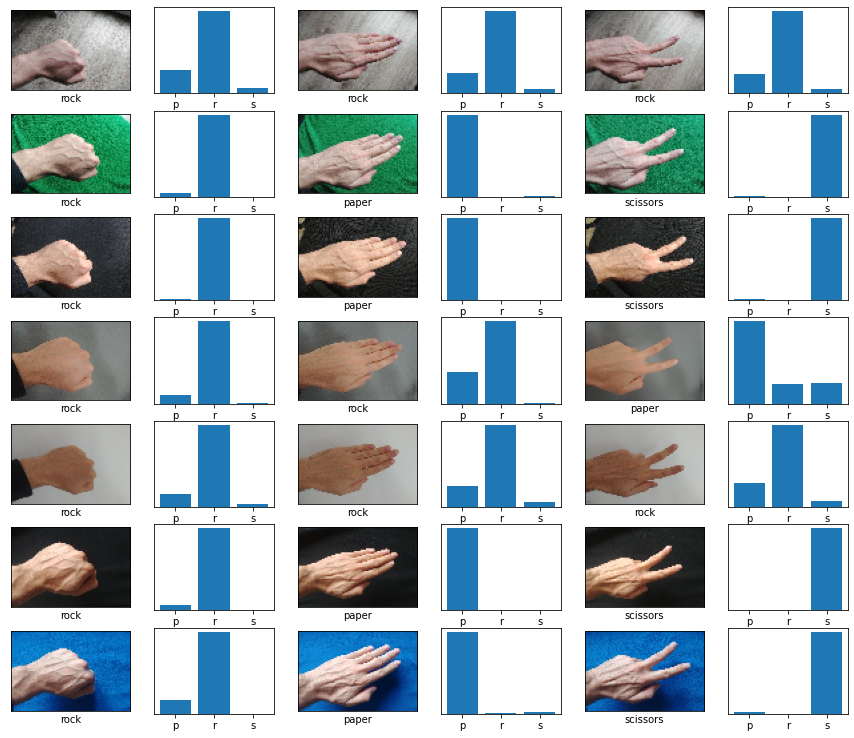

In [7]:
plt.figure(figsize=(15,13))
grid_x = 6
grid_y = int(no_images/3)

for i in range(no_images):
    my_image = image.load_img('pictures_r\\' + str(i+1)+'.jpg',target_size=image_shape,color_mode="rgb")
    my_image = image.img_to_array(my_image)
    my_image_p = np.expand_dims(my_image, axis=0)
    label_no = np.argmax(model.predict(my_image_p))
    label = pred_dict[label_no]
            
    plt.subplot(grid_y,grid_x,i*2+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)       
    plt.imshow(my_image/255)
    plt.xlabel(label)
    
    plt.subplot(grid_y,grid_x,i*2+2)
    plt.xticks(ticks=[0,1,2],labels=['p','r','s'])
    plt.yticks([])
    plt.grid(False)
    plt.bar(range(3),model.predict(my_image_p).reshape(3))
    
plt.savefig('predictor_rotated.jpg', bbox_inches='tight')